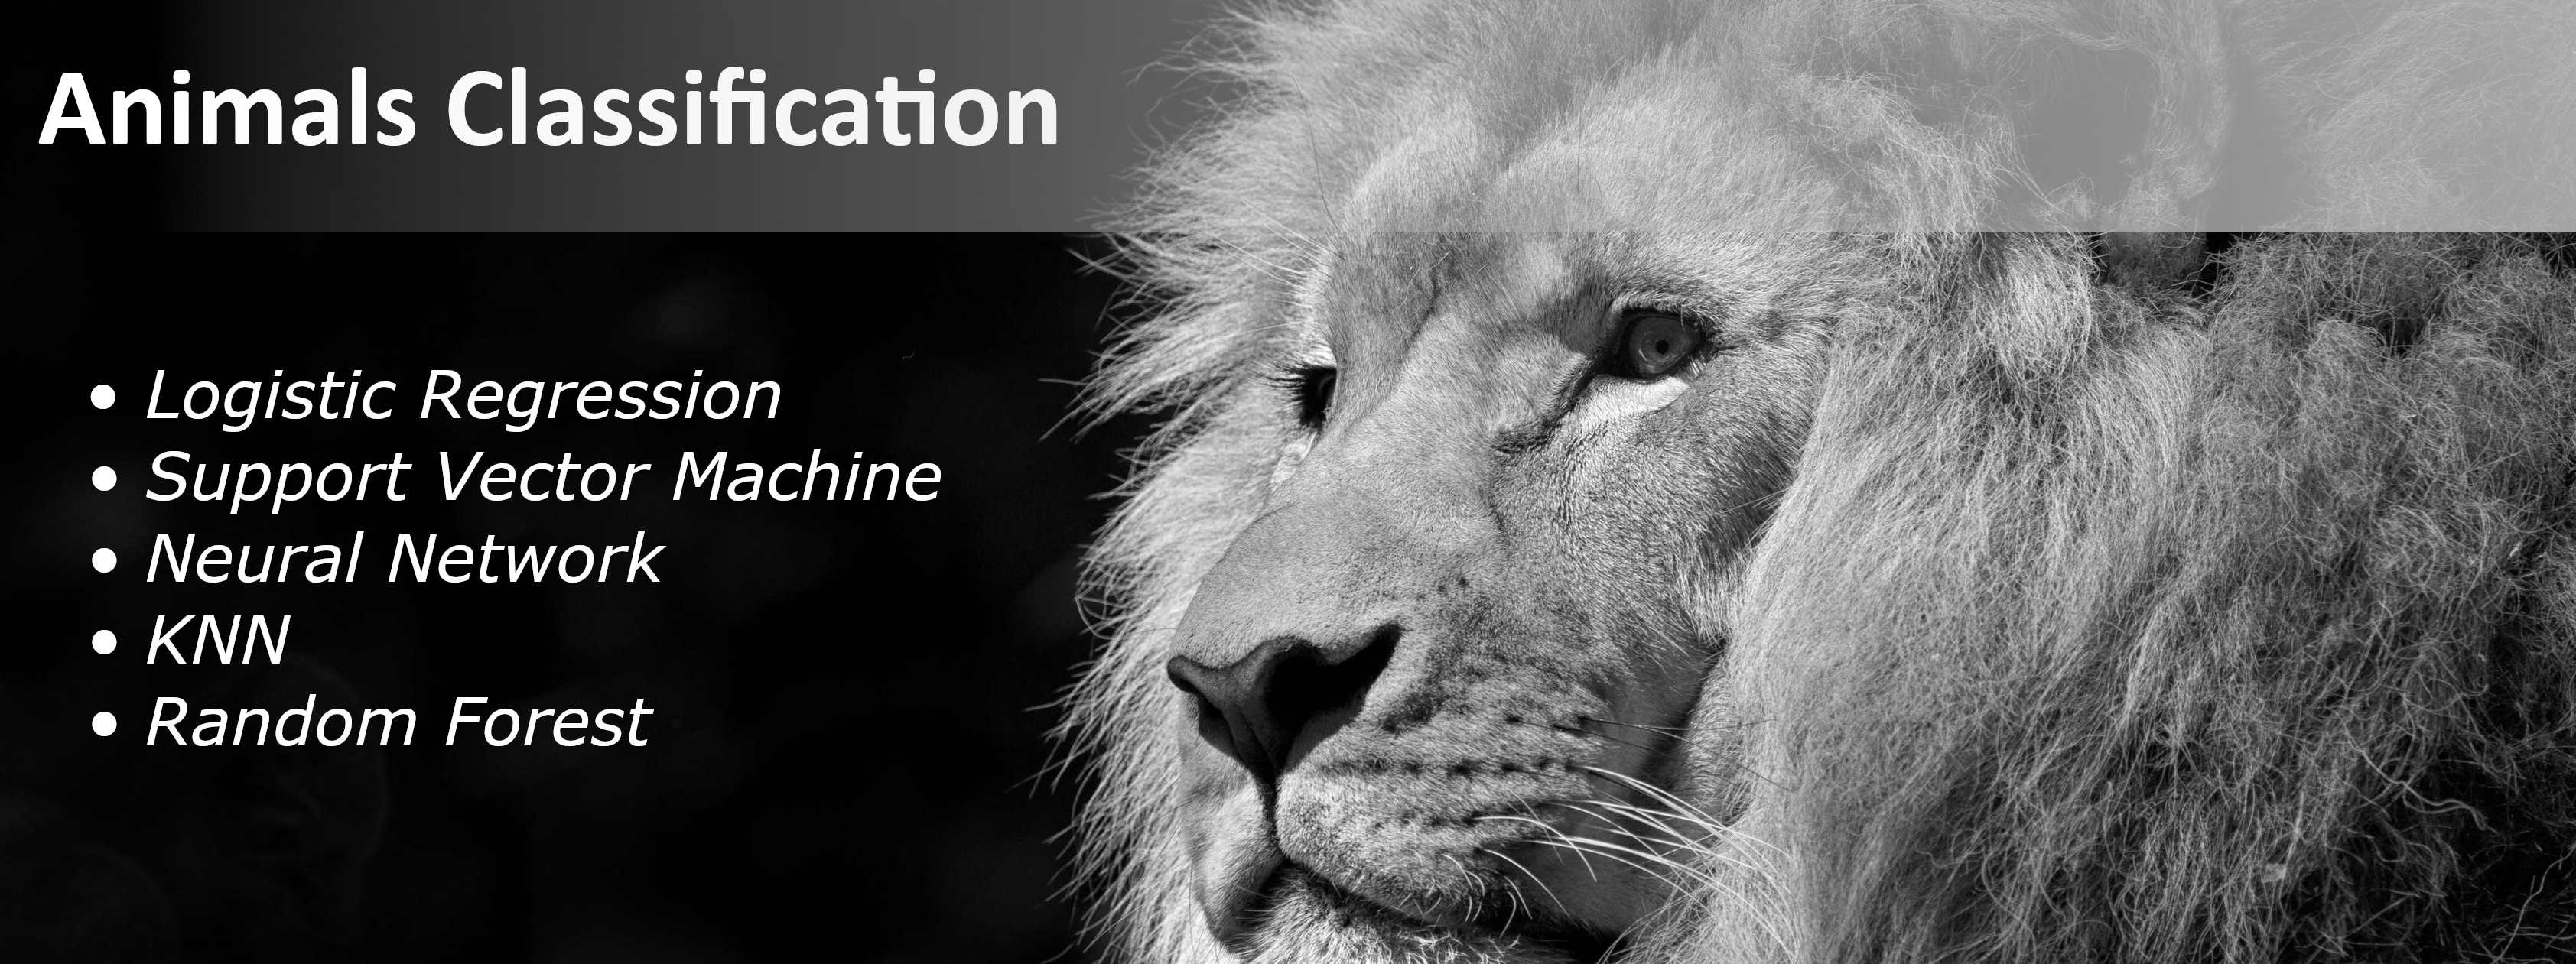

# 1. Introdução

Dataset disponível na [UCI Machine Learning](https://archive.ics.uci.edu/ml/datasets/Zoo) utilizado para aplicação de algoritmos de classificação.




### 1.1. Descrição do Dataset

O Dataset é composto por 101 registros, cada registro com a descrição de um animal, disponível em 16 colunas.
Há 7 classes de animais: Mamíferos, Passáros, Répteis, Peixes, Anfíbios, Insetos e Invertebrados.

### 1.2. Descrição das Variáveis


|       **Variável**      |                       **Descrição**                    |
|-------------------------|:------------------------------------------------------:|
|    **animal_name**      |      Nome do animal|
|    **hair**             |      Variável Booleana                   |
|    **feathers**         |      Variável Booleana         |
|    **eggs**             |      Variável Booleana                                    |
|    **milk**             |      Variável Booleana                        |
|    **airbone**          |      Variável Booleana|
|    **aquatic predator** |      Variável Booleana|
|    **toothed	backbone**|      Variável Booleana                    |
|    **breathes**         |      Variável Booleana                               |
|    **venomous**         |      Variável Booleana                          |
|    **legs**             |      Variável Booleana                                     |
|    **tail**             |      Variável Booleana |
|    **domestic**         |      Variável Booleana                        |
|    **catsize**          |      Variável Booleana               |
|    **class_type**       |      Variável Target, indica a classe a qual o animal pertence               |

### 1.3. Objetivo
     

Verificar qual algoritmo obtém o melhor desempenho na previsão da classe dos animais, baseado nas características descritas nas variáveis acima.

### <center> ------------------------------------------------------------------------------------------------------------------ </center>

# 2. Importação das Bibliotecas

In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import warnings
import networkx as nx
import seaborn as sns
warnings.filterwarnings('ignore')

%matplotlib inline

### <center> ------------------------------------------------------------------------------------------------------------------ </center>

# 3. Carregamento do Dataset

In [27]:
df = pd.read_csv('zoo.csv')

### <center> ------------------------------------------------------------------------------------------------------------------ </center>

# 4. Visualização Geral dos Dados

In [28]:
df.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [29]:
# O DataFrame é composto por 101 registros (linhas) e 18 atributos (colunas).
df.shape

(101, 18)

In [30]:
# Informações básicas do DataFrame.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal_name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  class_type   101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


> #### Conclui-se que não há valores ausentes e todas as variáveis, exceto a "animal_name" são numéricas.

In [31]:
# Verificação das variáveis numéricas.
df.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [32]:
# Verificação da variável categórica
df.describe(include='O')

,animal_name
count,101
unique,100
top,frog
freq,2


> #### Nota-se a provável duplicação de um registro, iremos verificar mais adiante.

In [33]:
# Criação e visualização da coluna "Classe" de acordo com o tipo de animal para posterior plotagem do Grafo.
df['Classe'] = 'Mammal'
df.loc[df['class_type'].values == 2, 'Classe'] = 'Bird'
df.loc[df['class_type'].values == 3, 'Classe'] = 'Reptile'
df.loc[df['class_type'].values == 4, 'Classe'] = 'Fish'
df.loc[df['class_type'].values == 5, 'Classe'] = 'Amphibian'
df.loc[df['class_type'].values == 6, 'Classe'] = 'Bug'
df.loc[df['class_type'].values == 7, 'Classe'] = 'Invertebrate'
df[['class_type', 'Classe']].head(3)

,class_type,Classe
0,1,Mammal
1,1,Mammal
2,4,Fish


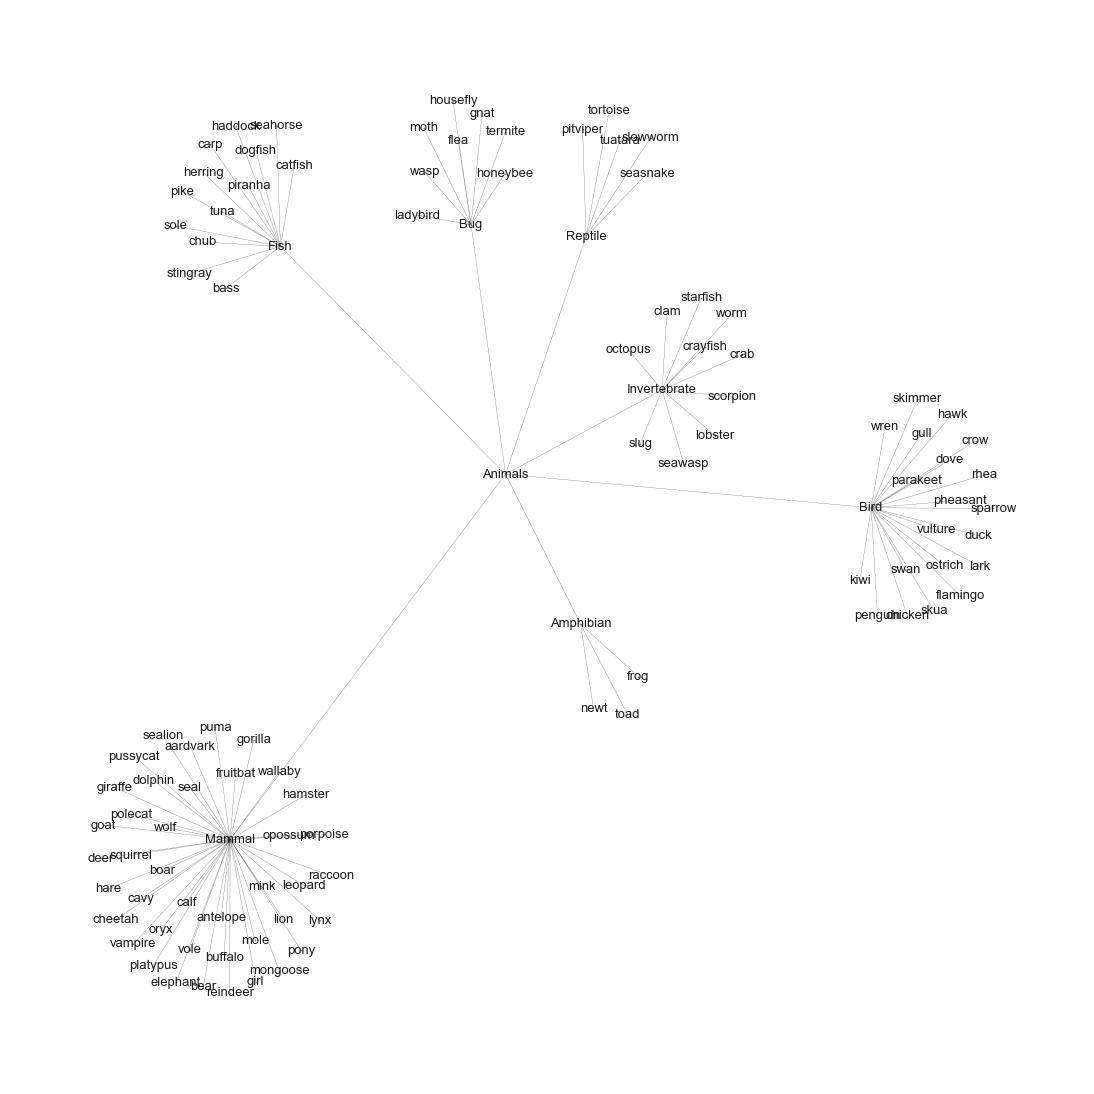

In [34]:
# Plotagem do Grafo, indicando a espécie de cada animal contido na base de dados.
categoriaAnimais = [str(x) for x in sorted(df['Classe'].unique())]
categoriaAnimaisAresta = [('Animals', x) for x in categoriaAnimais]
especies = [df['animal_name'][df['Classe'] == x].tolist() for x in sorted(df['Classe'].unique())]
especies = [j for i in especies for j in i]
especiesAresta = []

for animal in especies:
    for categoria in sorted(df['Classe'].unique()):
        if animal in df['animal_name'][df['Classe'] == categoria].tolist():
            especiesAresta.append(tuple((str(categoria), animal)))

arestaEspecies = especiesAresta + categoriaAnimaisAresta

plt.figure(figsize=(15, 15))
graph = nx.Graph()
graph.add_edges_from(arestaEspecies, color='red')

options = {'node_size': 0.25, 'width': 0.2,}

position = nx.spring_layout(graph)
nx.draw(graph, with_labels=True, pos=position, font_size=13, **options)
plt.show()


In [10]:
# Informações do grafo
print(nx.info(graph))

Graph with 108 nodes and 107 edges


<a name="a"></a>

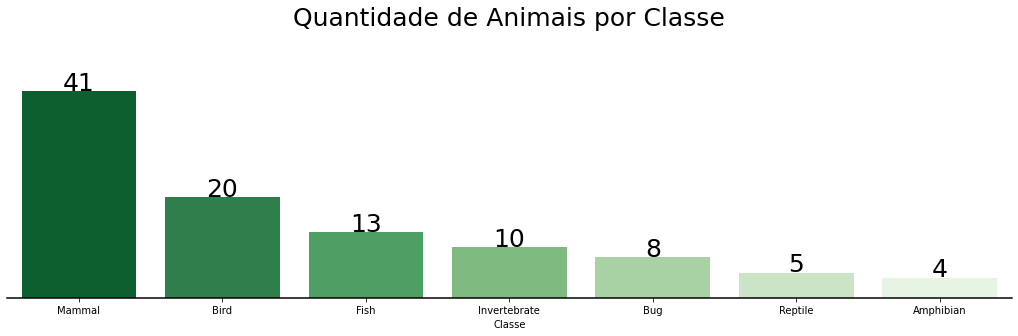

In [11]:
fig, ax = plt.subplots(figsize=(18, 4))

sns.countplot('Classe', data=df, palette='Greens_r', order = df['Classe'].value_counts().index)
plt.title('Quantidade de Animais por Classe', fontsize=25, pad=55)
ax.set_ylabel(''), ax.tick_params(axis='y', labelleft=False, left=None)

for axis in ['top', 'right', 'left']:    ax.spines[axis].set_color(None)
ax.spines['bottom'].set_linewidth(1.5)

for i in ax.patches:
    ax.annotate('{:,}'.format(int(i.get_height())),
    (i.get_x() + i.get_width() / 2, i.get_height()),
    ha='center', va='baseline', xytext=(0,1),
    textcoords='offset points', fontsize=25)
    
plt.show()

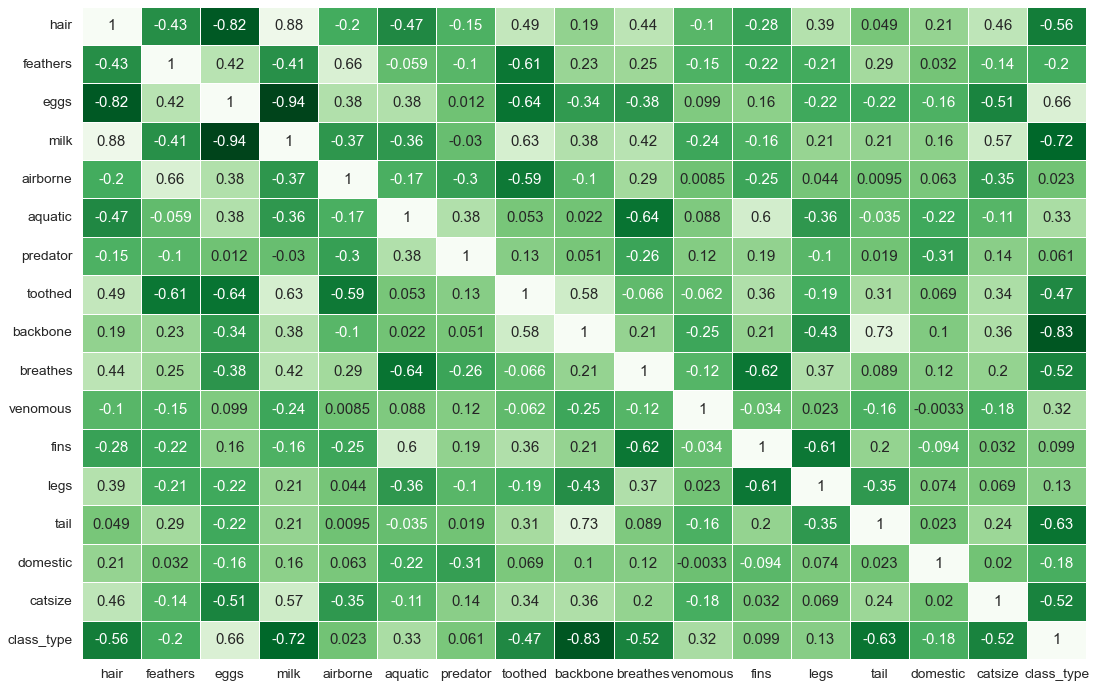

In [12]:
# Correlação entre as variáveis
plt.figure(figsize=(18, 12))
sns.set(font_scale=1.25)
sns.heatmap(df.corr(), annot=True, cbar=False, linewidths=0.5, cmap='Greens_r')
plt.show()

### <center> ------------------------------------------------------------------------------------------------------------------ </center>

# 5. Data Wrangling

In [13]:
# Conforme analisado na Visualização Geral dos Dados, vimos que o registro "frog" aparenta estar duplicado, vamos checar.
df.loc[df['animal_name'] == 'frog']

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type,Classe
25,frog,0,0,1,0,0,1,1,1,1,1,0,0,4,0,0,0,5,Amphibian
26,frog,0,0,1,0,0,1,1,1,1,1,1,0,4,0,0,0,5,Amphibian


> #### Podemos observar que as características que descrevem o animal "frog" diferem na coluna "venomous", portanto, trata-se de animais diferentes e não excluíremos o registro da base.

In [14]:
# Iremos deletar do DF as colunas "animal_classe" e "Classe", uma vez que não serão úteis para a aplicação dos algoritmos.
df.drop(['animal_name', 'Classe'], axis=1, inplace=True)

In [15]:
# Nova visualização do DataFrame
df.head(2)

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1


### <center> ------------------------------------------------------------------------------------------------------------------ </center>

# 6. Preparação Machine Learning

### 6.1. Declaração das Variáveis Preditoras e Target.

In [16]:
X = df.drop('class_type', axis=1)
y = df['class_type']

### 6.2. Escalonamento dos Valores

In [17]:
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

### 6.3. Divisão das Variáveis entre Treino e Teste

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### <center> ------------------------------------------------------------------------------------------------------------------ </center>

# 7. Aplicação dos Modelos de Machine Learning

### 7.1. Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression
modeloRegressaoLogistica = LogisticRegression()
modeloRegressaoLogistica.fit(X_train, y_train);

### 7.2. Support Vector Machine

In [20]:
from sklearn.svm import SVC
modeloSVM = SVC(C=3)
modeloSVM.fit(X_train, y_train);

### 7.3. Neural Network

In [21]:
from sklearn.neural_network import MLPClassifier
modeloRedeNeural = MLPClassifier(hidden_layer_sizes=(64, 64))
modeloRedeNeural.fit(X_train, y_train);

### 7.4. KNN

In [22]:
from sklearn import neighbors
modeloKNN = neighbors.KNeighborsClassifier()
modeloKNN.fit(X_train, y_train);

### 7.5. Random Forest

In [23]:
from sklearn.ensemble import RandomForestClassifier

modeloRandomForest = RandomForestClassifier(n_estimators=200, max_depth=5, random_state=0)
modeloRandomForest.fit(X_train, y_train);

### <center> ------------------------------------------------------------------------------------------------------------------ </center>

# 8. Resultados

In [24]:
# Verificação do score na base de teste.
accLog = modeloRegressaoLogistica.score(X_test, y_test) * 100
accSVM = modeloSVM.score(X_test, y_test) * 100
accRNN = modeloRedeNeural.score(X_test, y_test) * 100
accKNN = modeloKNN.score(X_test, y_test) * 100
accRFT = modeloRandomForest.score(X_test, y_test) * 100

In [25]:
# Exibição dos Resultados.
print('-'*29)
print(f"{'Resultados':^29}")
print('-'*29)
print(f' Regressão Logística: {accLog:.2f}%')
print(f'                 SVM: {accSVM:.2f}%')
print(f'       Redes Neurais: {accRNN:.2f}%')
print(f'                 KNN: {accKNN:.2f}%')
print(f'       Random Forest: {accRFT:.2f}%')
print('-'*29)

-----------------------------
         Resultados          
-----------------------------
 Regressão Logística: 93.55%
                 SVM: 96.77%
       Redes Neurais: 93.55%
                 KNN: 96.77%
       Random Forest: 96.77%
-----------------------------


### <center> ------------------------------------------------------------------------------------------------------------------ </center>

# 9. Conclusões



* O escalonamento dos valores (em razão da coluna legs) surtiu efeito apenas nos algoritmos de Redes Neurais e KNN, não influenciando em nada nos demais;


* O parâmetro C no algoritmo SVM, responsável por controlar a tolerância a erros foi ajustado para 3, uma vez que é o valor mínimo para se atingir o melhor resultado durante os testes nesta base de dados;


* Foram criadas camadas ocultas no algoritmo de Redes Neurais, em razão da melhoria no desempenho do algoritmo;


* Todos os algoritmos tiveram desempenho semelhante; e


* A distribuição dos animais pode ser um problema ([imagem](#a)) , uma vez que há poucas espécies de anfíbios, répteis e insetos disponíves na base, principalmente se comparadas ao total de mamíferos.

### <center> ------------------------------------------------------------------------------------------------------------------ </center>

 |                                                                                                                                               |                                                       Contatos                                                      |                                                                                                                         |
 |:---------------------------------------------------------------------------------------------------------------------------------------------:|:-------------------------------------------------------------------------------------------------------------------:|:-----------------------------------------------------------------------------------------------------------------------:|
 | <img width=40 align='center' alt='Thiago Ferreira' src="https://cdn.jsdelivr.net/gh/devicons/devicon/icons/linkedin/linkedin-original.svg" /> | <img width=40 align='center' src="https://cdn.jsdelivr.net/gh/devicons/devicon/icons/github/github-original.svg" /> | <img width=40 align='center' src="https://cdn.jsdelivr.net/gh/devicons/devicon/icons/facebook/facebook-original.svg" /> |
 |                                            [Linkedin](https://www.linkedin.com/in/tferreirasilva/)                                            |                                    [Github](https://github.com/ThiagoFerreiraWD)                                    |                                [Facebook](https://www.facebook.com/thiago.ferreira.50746)                               |
 |                                                                                                                                               |                                                Autor: Thiago Ferreira                                               |                                                                                                                         |